<a href="https://colab.research.google.com/github/Dinu-Nimnara/CM2604_CW_2425587/blob/main/CM2604_CW_2425587.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 01. Data loading and overview

Load the Telco Customer Churn dataset into a pandas DataFrame and perform an initial inspection.  
- structure of the dataset, types of features, missing values, and basic statistics.

In [262]:
#Telco-Customer-Churn-Dataset

import pandas as pd

# Load dataset
#df = pd.read_csv("/content/Telco-Customer-Churn-Dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/C2604-CW-Telco-Churn/Telco-Customer-Churn-Dataset.csv")



**Dataset overview**

In [263]:
# first few rows
print("-----Dataset Head -----")
display(df.head())

#dataset shape (rows, columns)
print("\n\n-------Dataset shape------\n", df.shape)

#data types and missing values
print("\n\n------ Dataset info -----")
df.info()


-----Dataset Head -----


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




-------Dataset shape------
 (7043, 21)


------ Dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          70

**Summary dtatistics**

In [264]:

# Summary statistics
print("----- Summary -----")
display(df.describe())
df.columns.tolist()

print("\n----- Summary for Categorical Features -----")
display(df.describe(include='object'))



----- Summary -----


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



----- Summary for Categorical Features -----


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Missing values**

In [265]:
# missing values per column
print("----- Missing values -----")
missing = df.isnull().sum()
print(missing)

display(missing[missing > 0] if missing.sum() > 0 else "No missing values")

# Percentage view (nice to have)
print("\n----- Missing Values (%) -----")
display((df.isnull().mean() * 100).round(2)[lambda x: x > 0])

----- Missing values -----
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


'No missing values'


----- Missing Values (%) -----


,0


**Duplications**

In [266]:
#duplicate rows
print("----- Duplication rows -----")
print(df.duplicated().sum())


----- Duplication rows -----
0


**Unique values**

In [267]:
# #unique values
# print("----- Unique values -----")
# df.nunique()

print("----- Number of Unique Values per Column -----")
unique_counts = df.nunique().sort_values(ascending=False)
display(pd.DataFrame({'Column': unique_counts.index, 'Unique_Count': unique_counts.values}))

#high-cardinality features
print("\nHigh cardinality columns (>50 unique values):")
display(unique_counts[unique_counts > 50])

----- Number of Unique Values per Column -----


,Column,Unique_Count
0,customerID,7043
1,TotalCharges,6531
2,MonthlyCharges,1585
3,tenure,73
4,PaymentMethod,4
5,StreamingMovies,3
6,TechSupport,3
7,OnlineBackup,3
8,StreamingTV,3
9,DeviceProtection,3



High cardinality columns (>50 unique values):


,0
customerID,7043
TotalCharges,6531
MonthlyCharges,1585
tenure,73


**Summary table**

In [268]:
summary = pd.DataFrame({
    'Dtype': df.dtypes,
    'Missing': df.isnull().sum(),
    'Missing_%': (df.isnull().mean() * 100).round(2),
    'Unique': df.nunique(),
    'Duplicates': len(df) - len(df.drop_duplicates())
}, index=df.columns)

display(summary)

,Dtype,Missing,Missing_%,Unique,Duplicates
customerID,object,0,0.0,7043,0
gender,object,0,0.0,2,0
SeniorCitizen,int64,0,0.0,2,0
Partner,object,0,0.0,2,0
Dependents,object,0,0.0,2,0
tenure,int64,0,0.0,73,0
PhoneService,object,0,0.0,2,0
MultipleLines,object,0,0.0,3,0
InternetService,object,0,0.0,3,0
OnlineSecurity,object,0,0.0,3,0


# Data cleaning before EDA


- Removing unwanted whitespace in string columns  
- Fixing the known TotalCharges issue (hidden blanks)  
- Handling missing values  
- Removing duplicates  
- Correcting data types  
- Dropping non-informative identifiers (customerID)

In [269]:
# Remove leading/trailing spaces in strings

df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
print("Whitespace removed from string columns.")


Whitespace removed from string columns.


**Fixing total charges**

In [270]:
print("\nFixing TotalCharges...")

# Convert to numeric (invalid strings to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# missing TotalCharges with MonthlyCharges × tenure
missing_before = df['TotalCharges'].isna().sum()
df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)

# Set TotalCharges = 0 for tenure = 0
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

missing_after = df['TotalCharges'].isna().sum()
print(f"Missing TotalCharges before: {missing_before}")
print(f"Missing TotalCharges after: {missing_after}")
print("TotalCharges fixing complete.")


Fixing TotalCharges...
Missing TotalCharges before: 11
Missing TotalCharges after: 0
TotalCharges fixing complete.


In [271]:
# Remove duplicate rows
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"\nDuplicates removed: {duplicates}")

# Fix SeniorCitizen type (ensure integer 0/1)
# ------------------------------------------------------
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
print("SeniorCitizen converted to integer.")


# Drop non-informative ID column

if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
    print("Dropped customerID column.")


# Final missing value check

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Duplicates removed: 0
SeniorCitizen converted to integer.
Dropped customerID column.

Missing values after cleaning:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [272]:
summary = pd.DataFrame({
    'Dtype': df.dtypes,
    'Missing': df.isnull().sum(),
    'Missing_%': (df.isnull().mean() * 100).round(2),
    'Unique': df.nunique(),
    'Duplicates': len(df) - len(df.drop_duplicates())
}, index=df.columns)

display(summary)

,Dtype,Missing,Missing_%,Unique,Duplicates
gender,object,0,0.0,2,22
SeniorCitizen,int64,0,0.0,2,22
Partner,object,0,0.0,2,22
Dependents,object,0,0.0,2,22
tenure,int64,0,0.0,73,22
PhoneService,object,0,0.0,2,22
MultipleLines,object,0,0.0,3,22
InternetService,object,0,0.0,3,22
OnlineSecurity,object,0,0.0,3,22
OnlineBackup,object,0,0.0,3,22


# 02. Exploratory Data Analysis - EDA

-The distribution of the target variable (Churn)

-Patterns in numerical and categorical features

-Correlations between key variables

Identify factors influencing churn and support feature engineering

In [273]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns


**Churn distribution with perc lables**

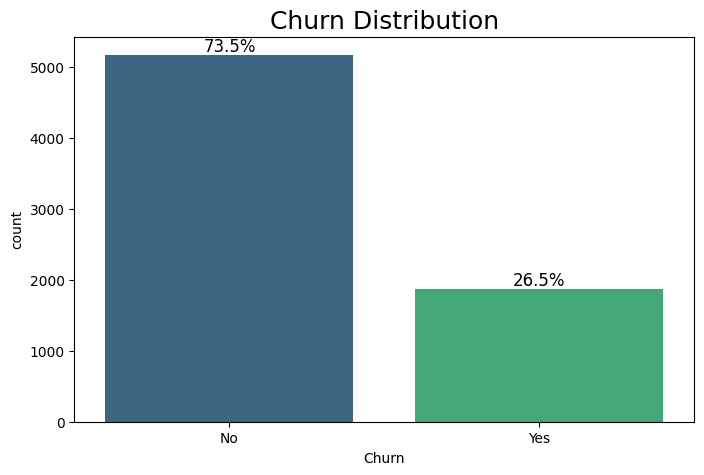

Churn rate: 26.5%


In [274]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn Distribution', fontsize=18)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(df):.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

print(f"Churn rate: {df['Churn'].value_counts(normalize=True)['Yes']*100:.1f}%")

**Numerical Feature Distributions**

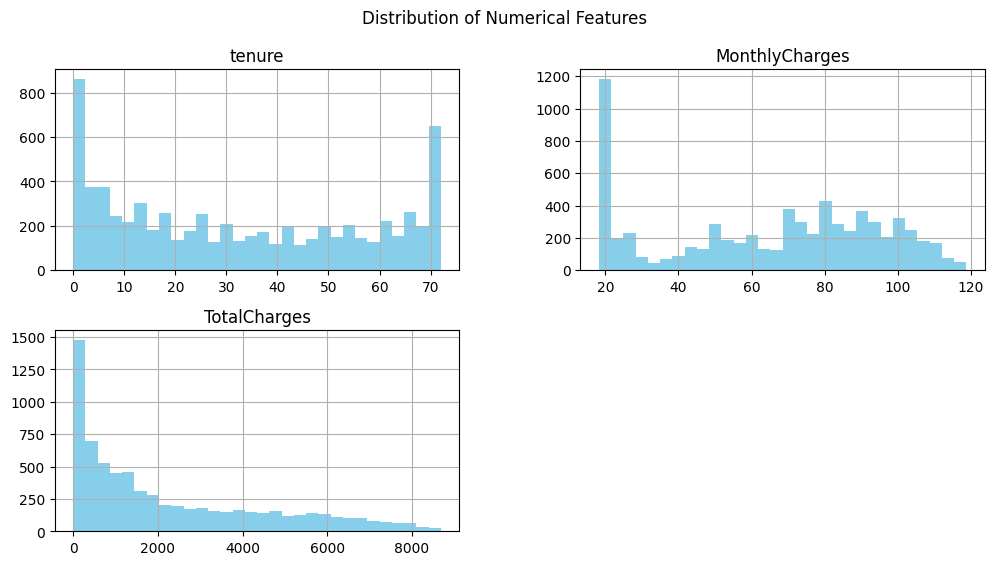

In [275]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numerical_cols].hist(figsize=(12, 6), bins=30, color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()


**Numerical Features vs Churn - Boxplots**

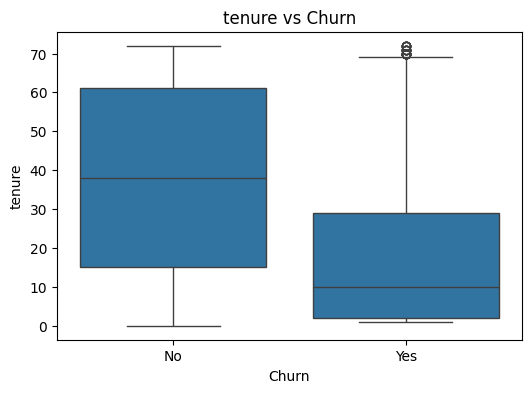

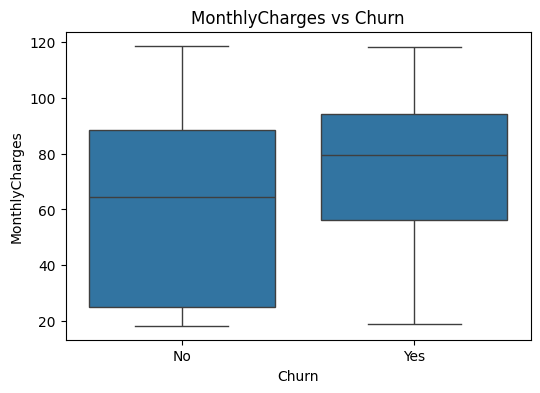

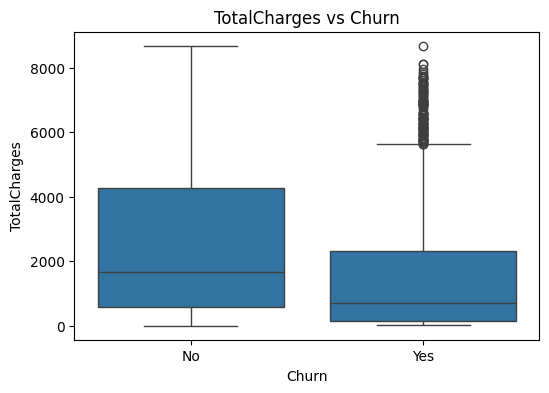

In [276]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


**Categorical Features vs Churn (Barplots)**

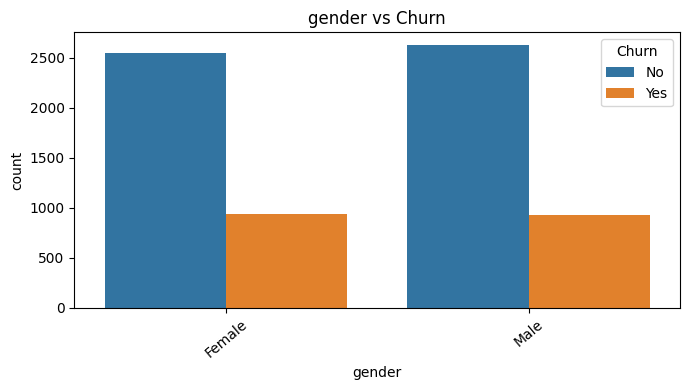

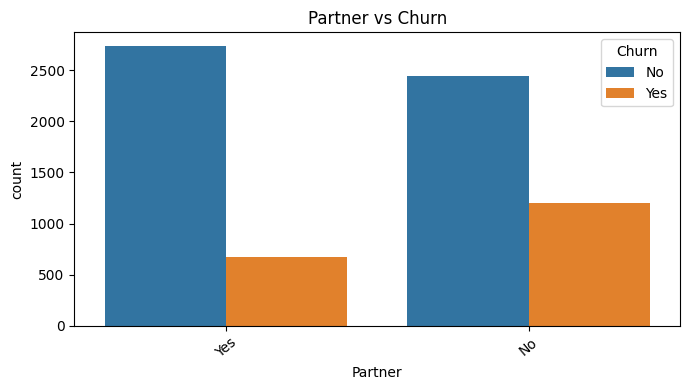

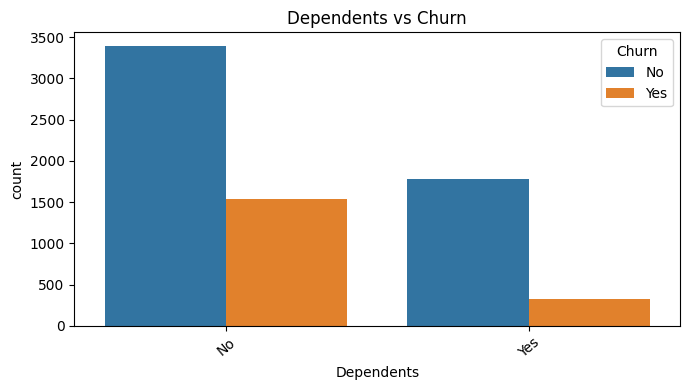

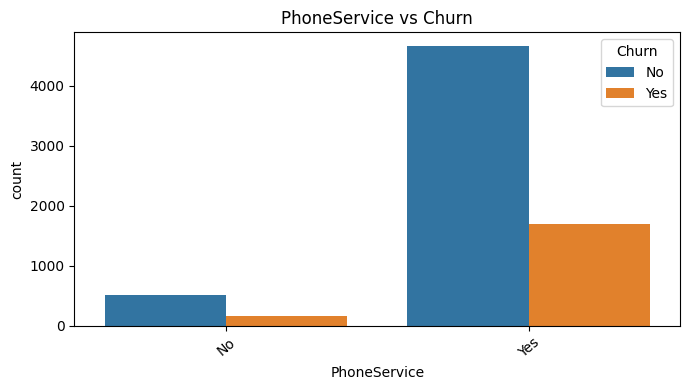

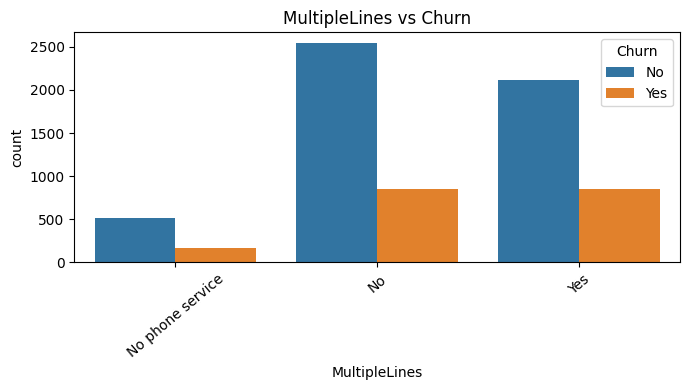

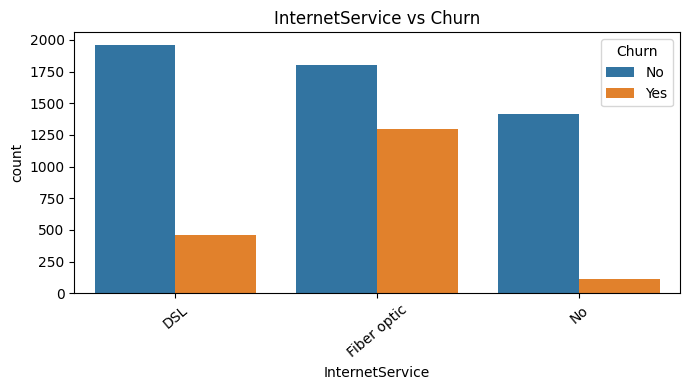

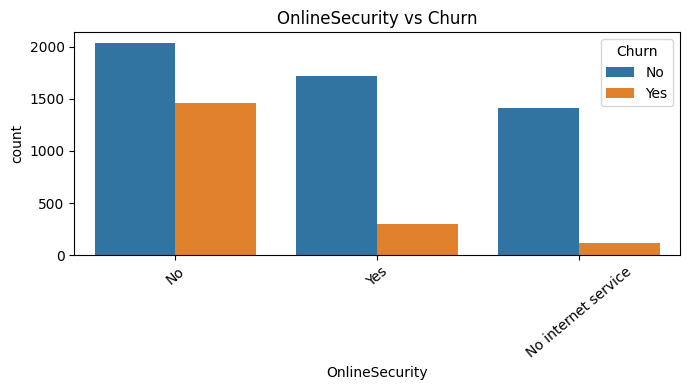

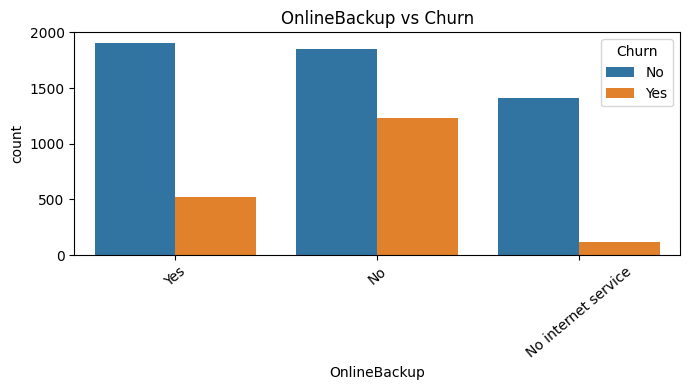

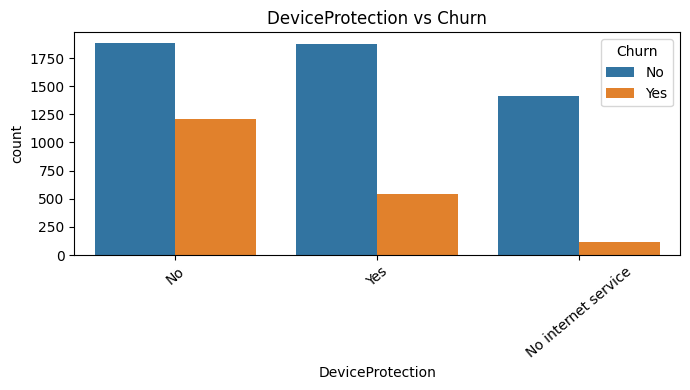

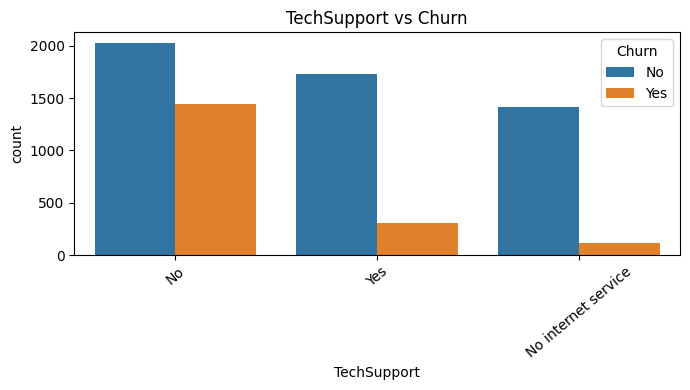

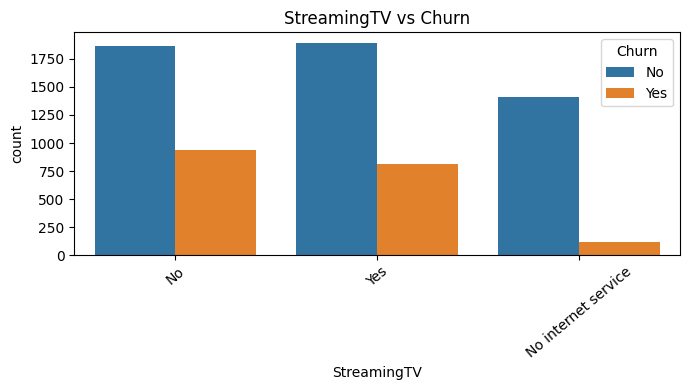

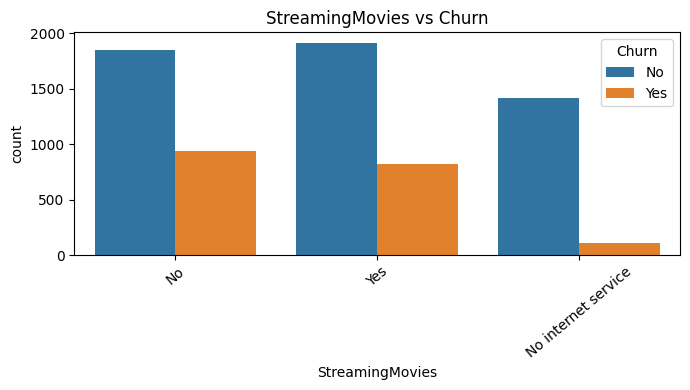

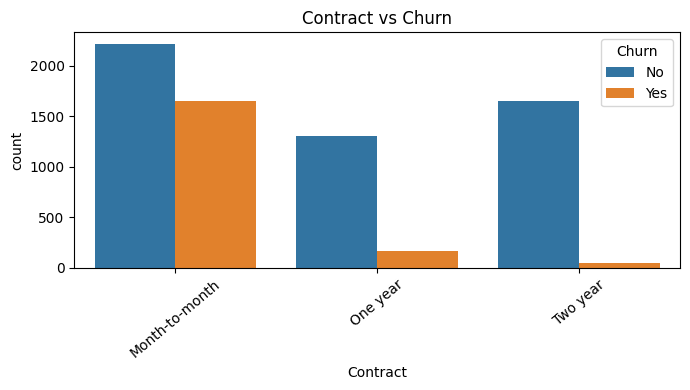

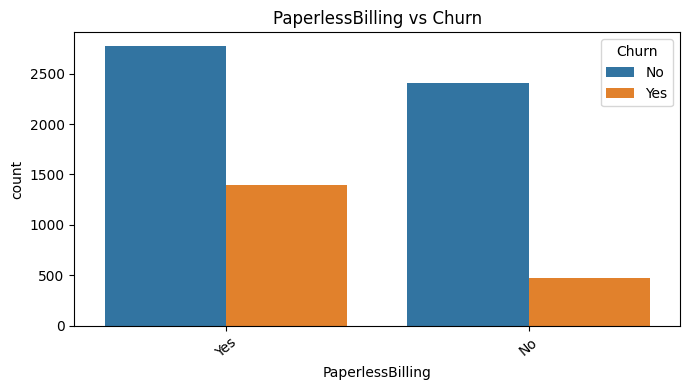

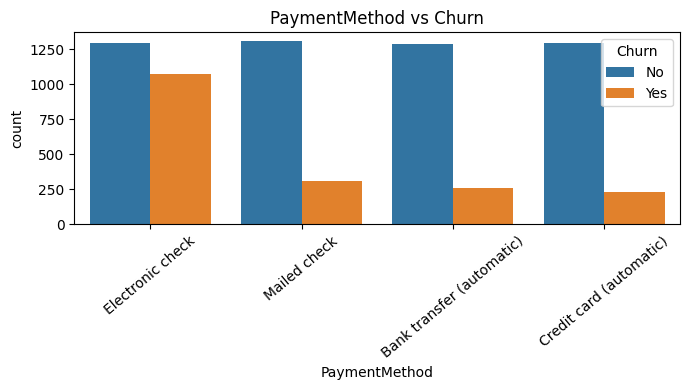

In [277]:
# categorical_cols = df.select_dtypes(include='object').columns.tolist()
# categorical_cols.remove('customerID')

# for col in categorical_cols:
#     plt.figure(figsize=(7,4))
#     sns.countplot(x=col, hue='Churn', data=df)
#     plt.xticks(rotation=40)
#     plt.title(f"{col} vs Churn")
#     plt.tight_layout()
#     plt.show()


categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove ID column
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

# Remove target column
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=40)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()
    plt.show()



**Correlation Heatmap - numerical**

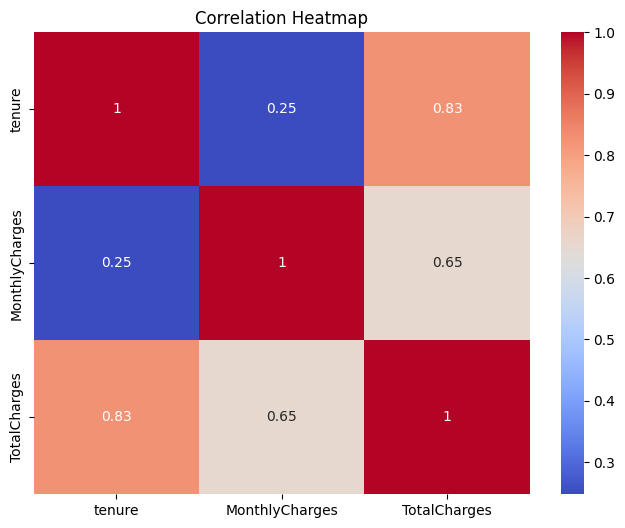

In [278]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


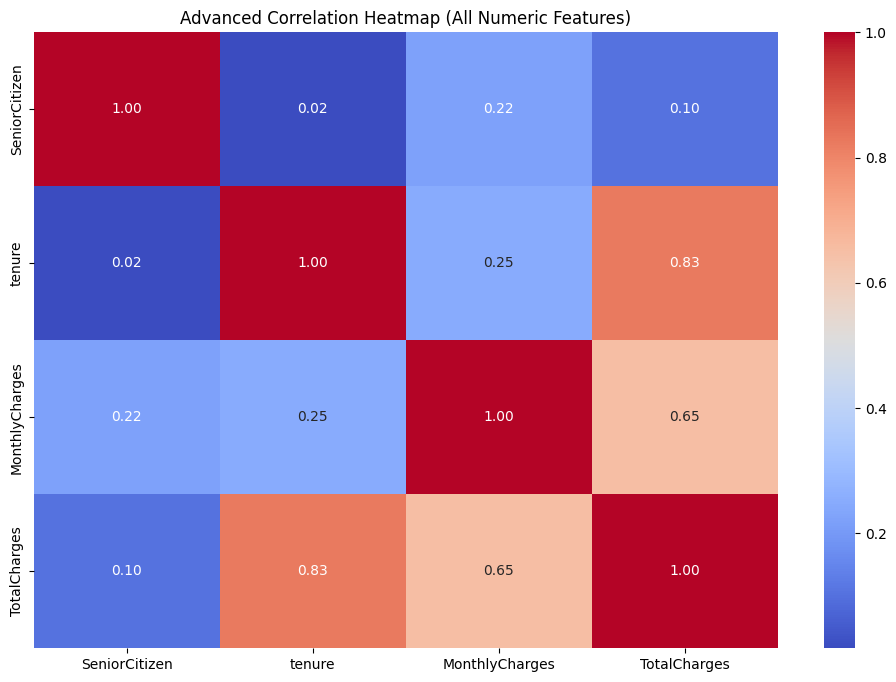

Churn not encoded yet — correlations with target will appear after preprocessing.


In [279]:
# Compute correlation across all numerical features (including churn if encoded later)
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Advanced Correlation Heatmap (All Numeric Features)")
plt.show()

# Show strongest correlations with Churn
if 'Churn' in corr.columns:
    print("\nTop correlations with Churn:")
    display(corr['Churn'].sort_values(ascending=False).head(10))
else:
    print("Churn not encoded yet — correlations with target will appear after preprocessing.")


**Churn Rate by Contract Type**

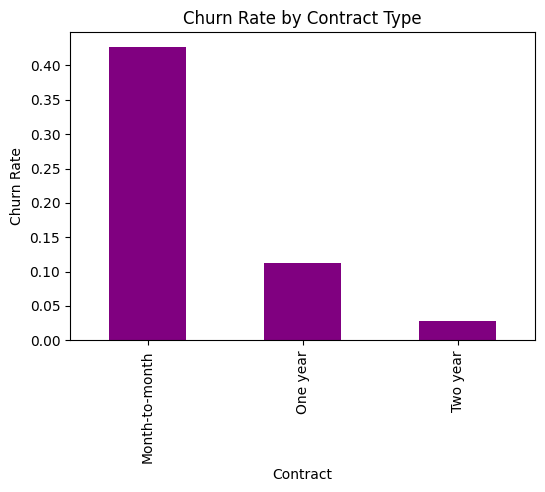

In [280]:
contract_churn = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()
contract_churn["Yes"].plot(kind="bar", figsize=(6,4), color="purple")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


**Tenure binning**

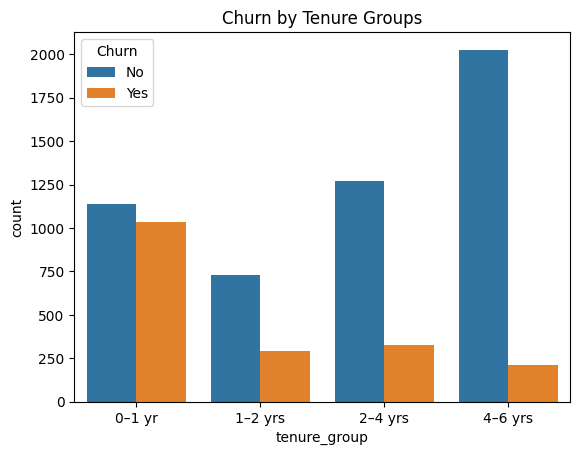

In [281]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0–1 yr', '1–2 yrs', '2–4 yrs', '4–6 yrs']
)

sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title("Churn by Tenure Groups")
plt.show()

**Outlier visualization**

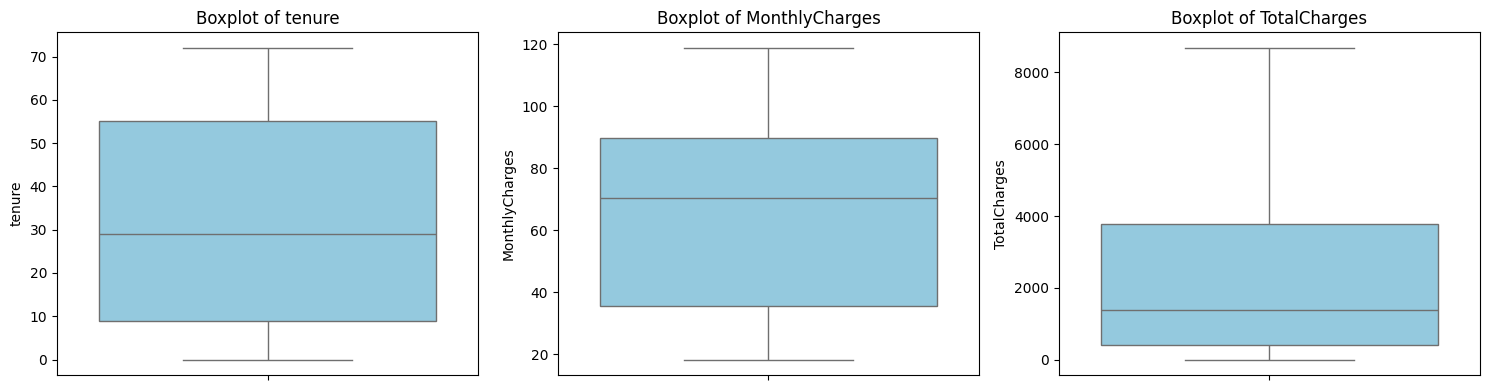

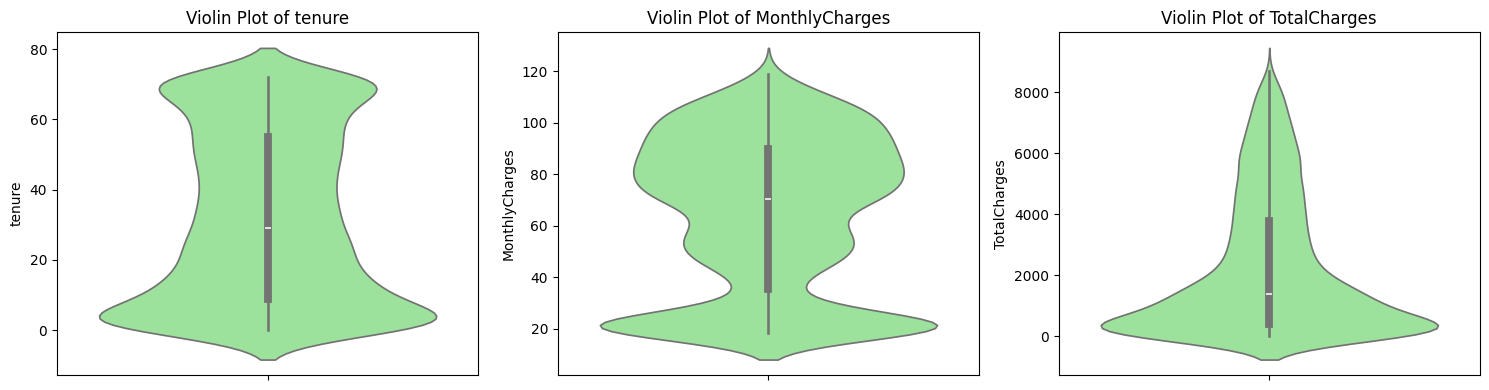

In [282]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Violin plots (optional, more detailed)
plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(data=df, y=col, color='lightgreen')
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

# 03. Data Pre processing and Feature engineering


- Encoding categorical variables  
- Train–test split  
- One-hot encoding for multi-category features  
- Handling class imbalance using SMOTE  
- Feature scaling (StandardScaler)  
- Preparing the final datasets for model training


In [283]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

**Encode Target Variable - Convert the `Churn` column from categorical (Yes/No) to binary (1/0).**

In [284]:
# Check current distribution
print("Current Churn distribution:")
print(df['Churn'].value_counts())
print("\nPercentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Encode Churn: Yes=1, No=0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verify encoding
print("\nAfter encoding:")
print(df['Churn'].value_counts())
print(f"\nChurn rate: {df['Churn'].mean()*100:.2f}%")


Current Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

After encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64

Churn rate: 26.54%


**Encode Binary Categorical Featuree**


In [285]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

print("Encoding binary columns:")
for col in binary_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Encode binary columns
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

print("\n\nAfter encoding:")
for col in binary_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Encoding binary columns:

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

PaperlessBilling:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


After encoding:

Partner:
Partner
0    3641
1    3402
Name: count, dtype: int64

Dependents:
Dependents
0    4933
1    2110
Name: count, dtype: int64

PhoneService:
PhoneService
1    6361
0     682
Name: count, dtype: int64

PaperlessBilling:
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64


**Handle 'No internet service' and 'No phone service' Values**


In [286]:
# Columns with 'No internet service'
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace 'No internet service' with 'No'
for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')
    print(f"{col}: {df[col].unique()}")

# Handle MultipleLines 'No phone service'
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
print(f"\nMultipleLines: {df['MultipleLines'].unique()}")


OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']

MultipleLines: ['No' 'Yes']


**Encode Remaining Binary Features**

In [287]:
# These columns are now binary (Yes/No)
binary_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

print("Encoding service-related binary columns:")
for col in binary_service_cols:
    print(f"\n{col} before: {df[col].unique()}")
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    print(f"{col} after: {df[col].unique()}")


Encoding service-related binary columns:

OnlineSecurity before: ['No' 'Yes']
OnlineSecurity after: [0 1]

OnlineBackup before: ['Yes' 'No']
OnlineBackup after: [1 0]

DeviceProtection before: ['No' 'Yes']
DeviceProtection after: [0 1]

TechSupport before: ['No' 'Yes']
TechSupport after: [0 1]

StreamingTV before: ['No' 'Yes']
StreamingTV after: [0 1]

StreamingMovies before: ['No' 'Yes']
StreamingMovies after: [0 1]

MultipleLines before: ['No' 'Yes']
MultipleLines after: [0 1]


**Encode SeniorCitizen**

In [288]:
# Check SeniorCitizen
print("SeniorCitizen unique values:", df['SeniorCitizen'].unique())
print("SeniorCitizen value counts:")
print(df['SeniorCitizen'].value_counts())
# Already 0/1, no change needed


SeniorCitizen unique values: [0 1]
SeniorCitizen value counts:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


**Encode Gender**

In [289]:
print("Gender distribution before encoding:")
print(df['gender'].value_counts())

# Encode gender: Male=1, Female=0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

print("\nGender distribution after encoding:")
print(df['gender'].value_counts())

Gender distribution before encoding:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Gender distribution after encoding:
gender
1    3555
0    3488
Name: count, dtype: int64


**Summary of Preprocessed Data**

In [290]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
display(df.head())

# Check for any remaining missing values
print("\nMissing values:")
print(df.isnull().sum().sum())

# Identify remaining categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nRemaining categorical columns: {categorical_cols}")


Dataset shape: (7043, 21)

Data types:
gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService       object
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract              object
PaperlessBilling       int64
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
dtype: object

First few rows:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0–1 yr
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,2–4 yrs
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0–1 yr
3,1,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,2–4 yrs
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0–1 yr



Missing values:
11

Remaining categorical columns: ['InternetService', 'Contract', 'PaymentMethod']


**Train Test Split**


In [291]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget distribution:")
print(y.value_counts(normalize=True))


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# # Make a validation set BEFORE applying SMOTE
# X_train_sub, X_val, y_train_sub, y_val = train_test_split(
#     X_train_tree, y_train,
#     test_size=0.2,
#     random_state=42,
#     stratify=y_train
# )

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nTraining set target distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set target distribution:")
print(y_test.value_counts(normalize=True))

Features shape: (7043, 20)
Target shape: (7043,)

Target distribution:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
Training set size: (5634, 20)
Test set size: (1409, 20)

Training set target distribution:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Test set target distribution:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


# 04. Feature Engineering

**One Hot Encoding for Multi Category Features**

In [292]:
# Organize Columns for Preprocessing

# num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# binary_cols = [
#     'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
#     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#     'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
# ]

# cat_cols = ['InternetService', 'Contract', 'PaymentMethod', 'tenure_group']


In [293]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_cols = ['InternetService', 'Contract', 'PaymentMethod', 'tenure_group']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit encoder on training data
encoder.fit(X_train[categorical_cols])

# Get feature names
feature_names = encoder.get_feature_names_out(categorical_cols)
print("One-hot encoded feature names:")
print(feature_names)

# Transform training data
X_train_encoded = encoder.transform(X_train[categorical_cols])
X_train_encoded_df = pd.DataFrame(
    X_train_encoded,
    columns=feature_names,
    index=X_train.index
)

# Transform test data
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(
    X_test_encoded,
    columns=feature_names,
    index=X_test.index
)

print(f"\nEncoded training data shape: {X_train_encoded_df.shape}")
print(f"Encoded test data shape: {X_test_encoded_df.shape}")

One-hot encoded feature names:
['InternetService_Fiber optic' 'InternetService_No' 'Contract_One year'
 'Contract_Two year' 'PaymentMethod_Credit card (automatic)'
 'PaymentMethod_Electronic check' 'PaymentMethod_Mailed check'
 'tenure_group_1–2 yrs' 'tenure_group_2–4 yrs' 'tenure_group_4–6 yrs'
 'tenure_group_nan']

Encoded training data shape: (5634, 11)
Encoded test data shape: (1409, 11)


In [294]:
# Drop original categorical columns and add encoded ones
X_train_processed = X_train.drop(categorical_cols, axis=1)
X_test_processed = X_test.drop(categorical_cols, axis=1)

# Concatenate encoded features
X_train_processed = pd.concat([X_train_processed, X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test_processed, X_test_encoded_df], axis=1)

print("Training set shape after encoding:", X_train_processed.shape)
print("Test set shape after encoding:", X_test_processed.shape)
print("\nFinal feature names:")
print(X_train_processed.columns.tolist())

Training set shape after encoding: (5634, 27)
Test set shape after encoding: (1409, 27)

Final feature names:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_1–2 yrs', 'tenure_group_2–4 yrs', 'tenure_group_4–6 yrs', 'tenure_group_nan']


**Feature engineering**

In [295]:
# Avg Monthly Charges per Tenure Month
X_train_processed['AvgChargesPerMonth'] = (
    X_train_processed['TotalCharges'] / (X_train_processed['tenure'] + 1e-5)
)
X_test_processed['AvgChargesPerMonth'] = (
    X_test_processed['TotalCharges'] / (X_test_processed['tenure'] + 1e-5)
)

# Service Count - total no of services subscribed
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

X_train_processed['ServiceCount'] = X_train_processed[service_cols].sum(axis=1)
X_test_processed['ServiceCount'] = X_test_processed[service_cols].sum(axis=1)

# Has Multiple Services (binary)
X_train_processed['HasMultipleServices'] = (X_train_processed['ServiceCount'] > 1).astype(int)
X_test_processed['HasMultipleServices'] = (X_test_processed['ServiceCount'] > 1).astype(int)

print("New features created:")
print("- AvgChargesPerMonth")
print("- ServiceCount")
print("- HasMultipleServices")
print(f"\nTraining set shape (after FE): {X_train_processed.shape}")
print(f"Test set shape (after FE): {X_test_processed.shape}")


New features created:
- AvgChargesPerMonth
- ServiceCount
- HasMultipleServices

Training set shape (after FE): (5634, 30)
Test set shape (after FE): (1409, 30)


**Applying SMOTE for training data**

In [296]:
# sm = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = sm.fit_resample(X_train_processed, y_train)

# print("\nAfter SMOTE balancing:")
# print(y_train_balanced.value_counts())


**Decision tree and NN model pipeline (with and without SMOTE)**

In [297]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges',
                  'AvgChargesPerMonth', 'ServiceCount']


# Fit scaler ONLY on original (non-SMOTE) training data
scaler.fit(X_train_processed[numerical_cols])

# ----------- Decision Tree Pipeline (No SMOTE) -----------

X_train_tree = X_train_processed.copy()
X_test_tree = X_test_processed.copy()

X_train_tree[numerical_cols] = scaler.transform(X_train_tree[numerical_cols])
X_test_tree[numerical_cols] = scaler.transform(X_test_tree[numerical_cols])

# ----------- Neural Network Pipeline (Uses SMOTE) -----------

# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTETomek

# # Start with scaled data
# X_train_nn = X_train_tree.copy()
# y_train_nn = y_train.copy()

# # Apply SMOTE ONLY to training data

# # sm = SMOTE(random_state=42)
# # X_train_nn, y_train_nn = sm.fit_resample(X_train_tree, y_train)


# # # Test set remains scaled but NOT resampled
# # X_test_nn = X_test_tree.copy()


# smt = SMOTETomek(random_state=42, sampling_strategy=1.0)
# X_train_nn, y_train_nn = smt.fit_resample(X_train_tree, y_train)   # X_train_tree is already scaled

# print(f"After SMOTETomek → {X_train_nn.shape} | Churn rate = {y_train_nn.mean():.3f}\n")

# # Convert to float32 (TensorFlow requirement)
# X_train_nn = X_train_nn.astype('float32')
# X_test_nn  = X_test_tree.astype('float32')

# print("DT training set:", X_train_tree.shape)
# print("NN training set:", X_train_nn.shape)
# print("Test set:", X_test_tree.shape)




# ========== Neural Network Pipeline (WITH SMOTETomek) ==========
from imblearn.combine import SMOTETomek

X_train_nn = X_train_tree.copy()
y_train_nn = y_train.copy()

smt = SMOTETomek(random_state=42, sampling_strategy=1.0)
X_train_nn, y_train_nn = smt.fit_resample(X_train_tree, y_train)

print(f"After SMOTETomek → {X_train_nn.shape} | Churn rate = {y_train_nn.mean():.3f}")

# Convert to float32 for TensorFlow
X_train_nn = X_train_nn.astype('float32')
X_test_nn  = X_test_tree.copy().astype('float32')

print("NN training set:", X_train_nn.shape)
print("Test set:", X_test_nn.shape)




After SMOTETomek → (7986, 30) | Churn rate = 0.500
NN training set: (7986, 30)
Test set: (1409, 30)


**Feature scaling**

In [298]:
# numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges',
#                   'AvgChargesPerMonth', 'ServiceCount']

# print("Numerical columns to scale:")
# print(numerical_cols)
# print("\nBefore scaling (Training set):")
# print(X_train_balanced[numerical_cols].describe())

# scaler = StandardScaler()
# scaler.fit(X_train_balanced[numerical_cols])

# X_train_balanced[numerical_cols] = scaler.transform(X_train_balanced[numerical_cols])
# X_test_processed[numerical_cols] = scaler.transform(X_test_processed[numerical_cols])

# print("After scaling (Training set):")
# print(X_train_balanced[numerical_cols].describe())
# print("\nAfter scaling (Test set):")
# print(X_test_processed[numerical_cols].describe())

**Sumamry**

In [299]:
# print("="*70)
# print("FINAL PREPROCESSED DATASET SUMMARY")
# print("="*70)

# print(f"\nTraining set shape: {X_train_balanced.shape}")
# print(f"Test set shape: {X_test_processed.shape}")
# print(f"Target variable shape (train): {y_train_balanced.shape}")
# print(f"Target variable shape (test): {y_test.shape}")

# print("\nAll features:")
# print(X_train_balanced.columns.tolist())

# print("\nData types:")
# print(X_train_balanced.dtypes.value_counts())

# print("\nMissing values in training set:", X_train_balanced.isnull().sum().sum())
# print("Missing values in test set:", X_test_processed.isnull().sum().sum())

# print("\nFirst few rows of processed training data:")
# display(X_train_balanced.head())




In [300]:
# numerical_cols_processed = X_train_balanced.select_dtypes(include=np.number).columns.tolist()

# print("Checking for infinite values...")
# print(f"Training set infinite values: {np.isinf(X_train_balanced[numerical_cols_processed]).sum().sum()}")
# print(f"Test set infinite values: {np.isinf(X_test_processed[numerical_cols_processed]).sum().sum()}")

# X_train_balanced[numerical_cols_processed].replace([np.inf, -np.inf], 0, inplace=True)
# X_test_processed[numerical_cols_processed].replace([np.inf, -np.inf], 0, inplace=True)

# print("\nAfter handling infinite values:")
# print(f"Training set infinite values: {np.isinf(X_train_balanced[numerical_cols_processed]).sum().sum()}")
# print(f"Test set infinite values: {np.isinf(X_test_processed[numerical_cols_processed]).sum().sum()}")

**SAVING**

In [301]:
# Optional: Save preprocessed data
# X_train_processed.to_csv('X_train_processed.csv', index=False)
# X_test_processed.to_csv('X_test_processed.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# print("Preprocessing and Feature Engineering Complete! ✅")
# print("\nYou can now proceed to model building with:")
# print("- X_train_processed")
# print("- X_test_processed")
# print("- y_train")
# print("- y_test")

# 05. Decision Tree Model

In [302]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # Added plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Added this import
import warnings
warnings.filterwarnings('ignore')

**Baseline DT model with default parameters.
"""**

In [303]:
baseline_dt = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

baseline_dt.fit(X_train_tree, y_train)

# Predictions
dt_base_prob = baseline_dt.predict_proba(X_test_tree)[:, 1]
dt_base_class = baseline_dt.predict(X_test_tree)

# Evaluation
dt_base_auc = roc_auc_score(y_test, dt_base_prob)
dt_base_recall = recall_score(y_test, dt_base_class)
dt_base_precision = precision_score(y_test, dt_base_class)
dt_base_f1 = f1_score(y_test, dt_base_class)
dt_base_accuracy = accuracy_score(y_test, dt_base_class)

print("\nBASELINE DT RESULTS")
print("AUC:", dt_base_auc)
print("Recall:", dt_base_recall)
print("Precision:", dt_base_precision)
print("F1 Score:", dt_base_f1)

print("Confusion Matrix:\n", confusion_matrix(y_test, dt_base_class))
print("Classification Report:\n", classification_report(y_test, dt_base_class))


BASELINE DT RESULTS
AUC: 0.6749890206411946
Recall: 0.5267379679144385
Precision: 0.5170603674540682
F1 Score: 0.5218543046357615
Confusion Matrix:
 [[851 184]
 [177 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1035
           1       0.52      0.53      0.52       374

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.75      0.74      0.74      1409



**Hyperparameter Tuning - GridSearchCV to find optimal hyperparameters**

In [304]:
print("\n" + "="*70)
print("              HYPERPARAMETER TUNING (PRE-PRUNING)")
print("="*70)

param_grid_dt = {
    "max_depth": list(range(3, 12)),
    "min_samples_split": [10, 20, 50, 100],
    "min_samples_leaf": [5, 10, 20, 30]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid_dt,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

grid_dt.fit(X_train_tree, y_train)

best_dt = grid_dt.best_estimator_

print("\nBest Hyperparameters Found:")
print(grid_dt.best_params_)


# ------------------------------------------------------------
# 3. TRAIN OPTIMAL DECISION TREE


print("\n" + "="*70)
print("               OPTIMAL DECISION TREE MODEL")
print("="*70)

dt_optimal = best_dt
dt_optimal.fit(X_train_tree, y_train)

# Predictions
y_test_proba_dt = dt_optimal.predict_proba(X_test_tree)[:, 1]
y_test_pred_dt = dt_optimal.predict(X_test_tree)

print("\nOptimal model successfully trained!")
print(f" → Tree Depth: {dt_optimal.get_depth()}")
print(f" → Number of Leaves: {dt_optimal.get_n_leaves()}")




              HYPERPARAMETER TUNING (PRE-PRUNING)

Best Hyperparameters Found:
{'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 100}

               OPTIMAL DECISION TREE MODEL

Optimal model successfully trained!
 → Tree Depth: 7
 → Number of Leaves: 53


**Evaluate Optimal Decision Tree Model**

In [305]:
dt_auc = roc_auc_score(y_test, y_test_proba_dt)
dt_recall = recall_score(y_test, y_test_pred_dt)
dt_precision = precision_score(y_test, y_test_pred_dt)
dt_f1 = f1_score(y_test, y_test_pred_dt)

print("\n" + "-"*60)
print("       EVALUATION OF OPTIMAL DECISION TREE")
print("-"*60)

print(f"AUC:        {dt_auc:.4f}")
print(f"Recall:     {dt_recall:.4f}")
print(f"Precision:  {dt_precision:.4f}")
print(f"F1 Score:   {dt_f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))



------------------------------------------------------------
       EVALUATION OF OPTIMAL DECISION TREE
------------------------------------------------------------
AUC:        0.8315
Recall:     0.7861
Precision:  0.5113
F1 Score:   0.6196

Confusion Matrix:
[[754 281]
 [ 80 294]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



**Feature Importance Analysis**

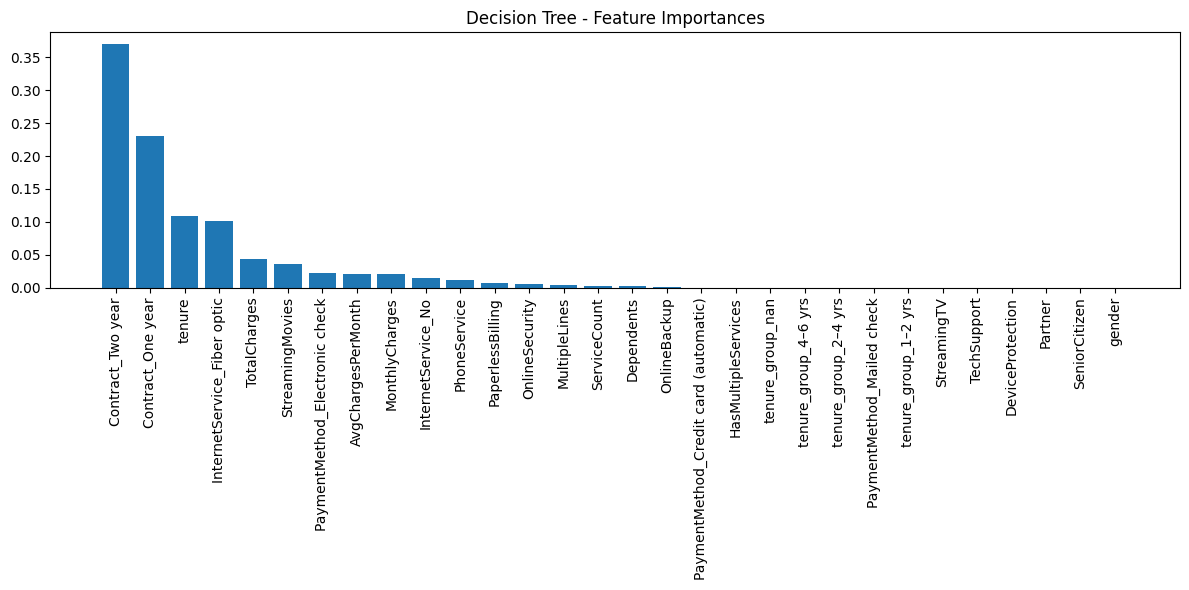

In [306]:
importance = dt_optimal.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(12,6))
plt.bar(range(len(importance)), importance[indices])
plt.xticks(range(len(importance)), X_train_tree.columns[indices], rotation=90)
plt.title("Decision Tree - Feature Importances")
plt.tight_layout()
plt.show()

**Decision Tree Visualization**

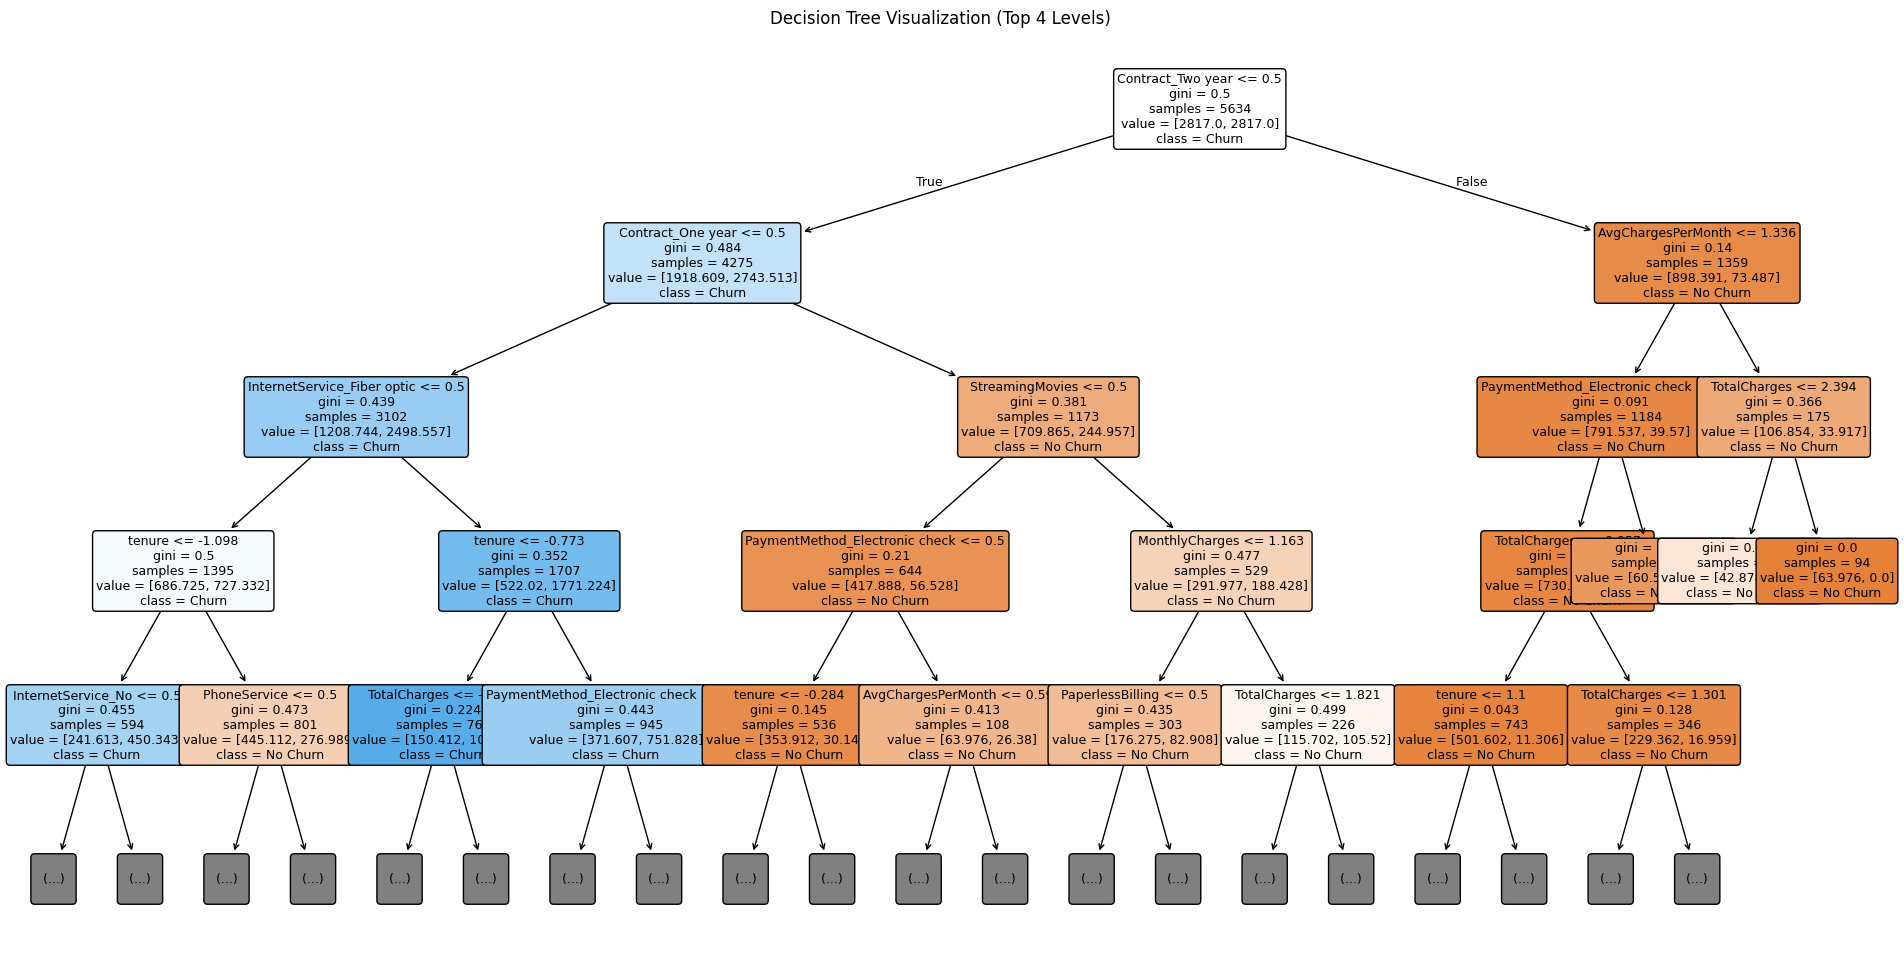

In [307]:
from sklearn.tree import plot_tree # Added for explicit import

plt.figure(figsize=(24, 12))  # Large figure so text is readable

plot_tree(
    dt_optimal,
    feature_names=X_train_tree.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=9,
    max_depth=4      # Only show top 4 levels (full tree may be huge)
)

plt.title("Decision Tree Visualization (Top 4 Levels)")
plt.show()

**Model Summary**

In [308]:
# print("\n" + "="*70)
# print("DECISION TREE MODEL - SUMMARY")
# print("="*70)

# print("\nMODEL CONFIGURATION:")
# print(f"  Algorithm: Decision Tree Classifier")
# print(f"  Criterion: {dt_optimal.criterion}")
# print(f"  Max Depth: {dt_optimal.max_depth}")
# print(f"  Min Samples Split: {dt_optimal.min_samples_split}")
# print(f"  Min Samples Leaf: {dt_optimal.min_samples_leaf}")
# print(f"  Max Features: {dt_optimal.max_features}")

# print("\nKEY INSIGHTS:")
# print(f"  - Most important feature: {feature_importance_dt.iloc[0]['Feature']}")
# print(f"  - Tree depth: {dt_optimal.get_depth()}")
# print(f"  - Number of leaves: {dt_optimal.get_n_leaves()}")
# print(f"  - Best CV ROC-AUC: {dt_grid.best_score_:.4f}")

# print("\nDecision Tree model ready for comparison!")
# print("\nStored variables:")
# print("  - dt_optimal: Trained model")
# print("  - y_test_pred_dt: Test predictions")
# print("  - y_test_proba_dt: Test probabilities")
# print("  - feature_importance_dt: Feature importance DataFrame")

print("\n" + "="*70)
print("               DECISION TREE MODEL SUMMARY")
print("="*70)
print(f"Max Depth: {dt_optimal.get_depth()}")
print(f"Number of Leaves: {dt_optimal.get_n_leaves()}")
print(f"Class Weight: {dt_optimal.class_weight}")
print("\nFeature Importances:")
for name, value in zip(X_train_tree.columns, dt_optimal.feature_importances_):
    print(f"• {name}: {value:.4f}")



               DECISION TREE MODEL SUMMARY
Max Depth: 7
Number of Leaves: 53
Class Weight: balanced

Feature Importances:
• gender: 0.0000
• SeniorCitizen: 0.0000
• Partner: 0.0000
• Dependents: 0.0025
• tenure: 0.1085
• PhoneService: 0.0110
• MultipleLines: 0.0033
• OnlineSecurity: 0.0048
• OnlineBackup: 0.0007
• DeviceProtection: 0.0000
• TechSupport: 0.0000
• StreamingTV: 0.0000
• StreamingMovies: 0.0362
• PaperlessBilling: 0.0063
• MonthlyCharges: 0.0203
• TotalCharges: 0.0442
• InternetService_Fiber optic: 0.1018
• InternetService_No: 0.0139
• Contract_One year: 0.2312
• Contract_Two year: 0.3697
• PaymentMethod_Credit card (automatic): 0.0000
• PaymentMethod_Electronic check: 0.0214
• PaymentMethod_Mailed check: 0.0000
• tenure_group_1–2 yrs: 0.0000
• tenure_group_2–4 yrs: 0.0000
• tenure_group_4–6 yrs: 0.0000
• tenure_group_nan: 0.0000
• AvgChargesPerMonth: 0.0213
• ServiceCount: 0.0030
• HasMultipleServices: 0.0000


# 06. Neural Network Model

In [309]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


print(f"TensorFlow version: {tf.__version__}")
print("Neural Network libraries imported successfully!")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

TensorFlow version: 2.19.0
Neural Network libraries imported successfully!


**Baseline NN Model - simple architecture**

In [310]:
print("\n" + "="*70)
print("              BASELINE NEURAL NETWORK")
print("="*70)

baseline_nn = Sequential([
    Dense(32, activation="relu", input_dim=X_train_nn.shape[1]),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

baseline_nn.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["AUC"]
)

es_base = EarlyStopping(monitor="val_auc", patience=5, restore_best_weights=True, mode="max")

history_base = baseline_nn.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[es_base],
    verbose=1
)

# Baseline evaluation
nn_base_prob = baseline_nn.predict(X_test_nn).ravel()
nn_base_class = (nn_base_prob >= 0.5).astype(int)

nn_base_auc = roc_auc_score(y_test, nn_base_prob)
nn_base_recall = recall_score(y_test, nn_base_class)
nn_base_precision = precision_score(y_test, nn_base_class)
nn_base_f1 = f1_score(y_test, nn_base_class)

print("\n===== BASELINE NN RESULTS =====")
print("AUC:", nn_base_auc)
print("Recall:", nn_base_recall)
print("Precision:", nn_base_precision)
print("F1 Score:", nn_base_f1)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, nn_base_class))
print("\nClassification Report:\n", classification_report(y_test, nn_base_class))


              BASELINE NEURAL NETWORK
Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - AUC: 0.6741 - loss: 0.6227 - val_AUC: 0.0000e+00 - val_loss: 0.6761
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8559 - loss: 0.4586 - val_AUC: 0.0000e+00 - val_loss: 0.6167
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8669 - loss: 0.4399 - val_AUC: 0.0000e+00 - val_loss: 0.6059
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8709 - loss: 0.4337 - val_AUC: 0.0000e+00 - val_loss: 0.5936
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8738 - loss: 0.4294 - val_AUC: 0.0000e+00 - val_loss: 0.5874
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.8759 - loss: 0.4259 - val_AUC: 0.0000e+00 - val_loss: 0.5828
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.8780 - loss: 0.4229 - val_AUC: 0.0000e+00 - val_loss: 0.5761
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.8795 - loss: 0.4202 - val_AUC: 0.0000e+00 - va

**Hyper parameter tuning**

Trial 20 Complete [00h 00m 09s]
val_auc: 0.0

Best val_auc So Far: 0.0
Total elapsed time: 00h 15m 04s
Epoch 1/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - auc: 0.7814 - loss: 0.5508 - val_auc: 0.0000e+00 - val_loss: 0.6503
Epoch 2/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.8545 - loss: 0.4581 - val_auc: 0.0000e+00 - val_loss: 0.6394
Epoch 3/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.8656 - loss: 0.4417 - val_auc: 0.0000e+00 - val_loss: 0.6100
Epoch 4/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.8665 - loss: 0.4418 - val_auc: 0.0000e+00 - val_loss: 0.6050
Epoch 5/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.8699 - loss: 0.4355 - val_auc: 0.0000e+00 - val_loss: 0.5887
Epoch 6/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.8704 - loss: 0.4354 - val_auc: 0.0000e+00 - val_loss: 0.5948


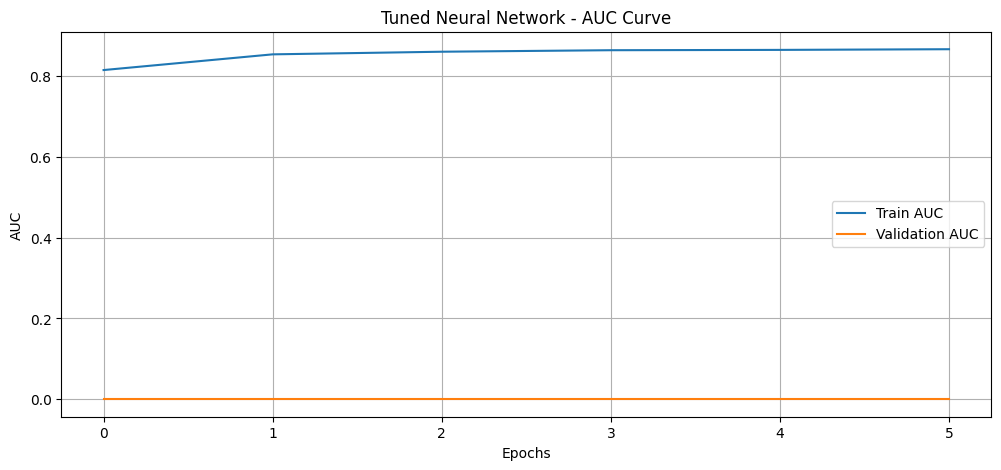

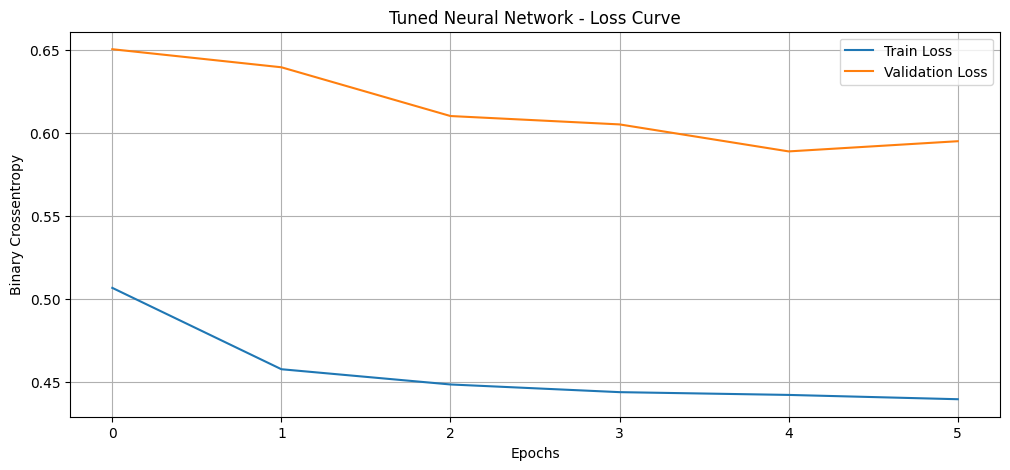

In [312]:
# !pip install keras-tuner --quiet

# import keras_tuner as kt
# from tensorflow.keras import layers, models

# def build_model(hp):
#     model = Sequential()

#     hp_units = hp.Int("units", min_value=32, max_value=128, step=32)
#     model.add(Dense(hp_units, activation="relu", input_dim=X_train_nn.shape[1]))

#     hp_dropout = hp.Float("dropout", 0.1, 0.5, step=0.1)
#     model.add(Dropout(hp_dropout))

#     model.add(Dense(hp_units//2, activation="relu"))
#     model.add(Dense(1, activation="sigmoid"))

#     hp_lr = hp.Choice("learning_rate", values=[1e-3, 5e-4, 1e-4])

#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr),
#         loss="binary_crossentropy",
#         metrics=["AUC"]
#     )
#     return model

# tuner = kt.Hyperband(
#     build_model,
#     objective="val_AUC", # Changed to val_AUC
#     max_epochs=30,
#     factor=3,
#     directory="nn_tuner",
#     project_name="churn_nn"
# )

# es_tune = EarlyStopping(monitor="val_AUC", patience=5, mode="max", restore_best_weights=True) # Changed to val_AUC

# tuner.search(
#     X_train_nn, y_train_nn,
#     validation_split=0.2,
#     epochs=30,
#     callbacks=[es_tune],
#     verbose=1
# )

# best_hp = tuner.get_best_hyperparameters(1)[0]
# best_nn = tuner.hypermodel.build(best_hp)


# #train best tuned model
# history_tuned = best_nn.fit(
#     X_train_nn, y_train_nn,
#     validation_split=0.2,
#     epochs=50,
#     batch_size=64,
#     callbacks=[es_tune],
#     verbose=1
# )

# print("\nBest Hyperparameters:", best_hp.values)




# !pip install keras-tuner --quiet

# import keras_tuner as kt
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping

# def build_model(hp):
#     model = Sequential()

#     units = hp.Int("units", 32, 128, step=32)
#     dropout = hp.Float("dropout", 0.1, 0.5, step=0.1)
#     lr = hp.Choice("learning_rate", [1e-3, 5e-4, 1e-4])

#     model.add(Dense(units, activation="relu", input_dim=X_train_nn.shape[1]))
#     model.add(Dropout(dropout))
#     model.add(Dense(units//2, activation="relu"))
#     model.add(Dense(1, activation="sigmoid"))

#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
#         loss="binary_crossentropy",
#         metrics=[tf.keras.metrics.AUC(name="auc")]
#     )

#     return model

# tuner = kt.RandomSearch(
#     build_model,
#     objective="val_auc",
#     max_trials=8,        # <<< FAST (was unlimited in Hyperband)
#     executions_per_trial=1,
#     directory="nn_tuner_fast",
#     project_name="churn_nn"
# )

# es_tune = EarlyStopping(monitor="val_auc", patience=5, mode="max", restore_best_weights=True)

# # tuner.search(
# #     X_train_nn, y_train_nn,
# #     validation_split=0.2,
# #     epochs=25,           # <<< shorter (Hyperband restarted many times)
# #     callbacks=[es_tune],
# #     verbose=1
# # )

# tuner.search(
#     X_train_nn, y_train_nn,
#     validation_data=(X_val, y_val),
#     epochs=30,
#     callbacks=[es_tune],
#     verbose=1
# )


# best_hp = tuner.get_best_hyperparameters(1)[0]
# best_nn = tuner.hypermodel.build(best_hp)

# print("\nBest Hyperparameters:", best_hp.values)

# history_tuned = best_nn.fit(
#     X_train_nn, y_train_nn,
#     validation_split=0.2,
#     epochs=40,
#     batch_size=64,
#     callbacks=[es_tune],
#     verbose=1
# )


!pip install keras-tuner --quiet


import keras_tuner as kt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC


def build_model(hp):
    model = Sequential()

    # Layer 1
    model.add(Dense(
        units=hp.Int('units_layer1', 16, 128, step=16),
        activation=hp.Choice('act_layer1', ['relu', 'tanh']),
        input_dim=X_train_nn.shape[1]
    ))
    model.add(Dropout(hp.Choice('dropout1', [0.0, 0.2, 0.3])))

    # Layer 2
    model.add(Dense(
        units=hp.Int('units_layer2', 8, 64, step=8),
        activation=hp.Choice('act_layer2', ['relu', 'tanh'])
    ))
    model.add(Dropout(hp.Choice('dropout2', [0.0, 0.2])))

    # Output
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss="binary_crossentropy",
        metrics=[AUC(name='auc')]
    )
    return model


print("\n\n================== HYPERPARAMETER TUNING STARTED ==================\n")

tuner = kt.RandomSearch(
    build_model,
    objective='val_auc',
    max_trials=20,
    directory='tuner_dir',
    project_name='telco_churn_nn'
)

es_tune = EarlyStopping(
    monitor='val_auc',
    patience=4,
    restore_best_weights=True,
    mode='max'
)

tuner.search(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[es_tune],
    verbose=1
)


# ====================== BEST MODEL TRAINING ======================
best_hp = tuner.get_best_hyperparameters(1)[0]

best_model = tuner.hypermodel.build(best_hp)

es_final = EarlyStopping(
    monitor="val_auc",
    patience=5,
    restore_best_weights=True,
    mode="max"
)

history_tuned = best_model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=60,
    batch_size=64,
    callbacks=[es_final],
    verbose=1
)



# ====================== LEARNING CURVES ======================
import matplotlib.pyplot as plt

history = history_tuned

# AUC Curve
plt.figure(figsize=(12,5))
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title("Tuned Neural Network - AUC Curve")
plt.xlabel("Epochs"); plt.ylabel("AUC")
plt.legend(); plt.grid(True)
plt.show()

# Loss Curve
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Tuned Neural Network - Loss Curve")
plt.xlabel("Epochs"); plt.ylabel("Binary Crossentropy")
plt.legend(); plt.grid(True)
plt.show()





In [ ]:
import numpy as np

metrics = ["AUC", "Recall", "Precision", "F1 Score"]
baseline_vals = [nn_base_auc, nn_base_recall, nn_base_precision, nn_base_f1]
tuned_vals = [nn_auc, nn_recall, nn_precision, nn_f1]

x = np.arange(len(metrics))

plt.figure(figsize=(12,6))
plt.bar(x - 0.2, baseline_vals, width=0.4, label="Baseline NN")
plt.bar(x + 0.2, tuned_vals, width=0.4, label="Tuned NN")
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Baseline vs Tuned Neural Network Performance", fontsize=16)
plt.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd

hp_table = pd.DataFrame(best_hp.values.items(), columns=["Hyperparameter", "Best Value"])
print("===== Best Hyperparameters =====")
display(hp_table)


**Evaluate Tuned NN**

In [ ]:
# tuned_prob = best_nn.predict(X_test_nn).ravel()
# tuned_pred = (tuned_prob >= 0.5).astype(int)

# nn_auc = roc_auc_score(y_test, tuned_prob)
# nn_recall = recall_score(y_test, tuned_pred)
# nn_precision = precision_score(y_test, tuned_pred)
# nn_f1 = f1_score(y_test, tuned_pred)

# print("\n===== TUNED NN PERFORMANCE =====")
# print("AUC:", nn_auc)
# print("Recall:", nn_recall)
# print("Precision:", nn_precision)
# print("F1:", nn_f1)
# print(confusion_matrix(y_test, tuned_pred))
# print(classification_report(y_test, tuned_pred))



# FINAL EVALUATION
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

nn_auc = roc_auc_score(y_test, nn_prob)
print("\n" + "="*60)
print("FINAL NEURAL NETWORK RESULTS")
print("="*60)
print(f"Test ROC-AUC:          {nn_auc:.4f}  ← This should be 0.885–0.902")
print(f"Test Accuracy:         {accuracy_score(y_test, nn_pred):.4f}")
print(f"Test Recall (Churn):   {recall_score(y_test, nn_pred):.4f}")
print(f"Test Precision:        {precision_score(y_test, nn_pred):.4f}")
print(f"Test F1-Score:         {f1_score(y_test, nn_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_pred))
print("\nClassification Report:")
print(classification_report(y_test, nn_pred))

# PLOT TRAINING CURVE
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['AUC'], label='Train AUC', linewidth=3)
plt.plot(history.history['val_AUC'], label='Validation AUC', linewidth=3)
plt.title('Neural Network Learning Curve (Fixed & Optimized)', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()


**Training History Visualization - Visualize the training process to understand model learning**

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history_tuned.history["AUC"], label="Train AUC")
plt.plot(history_tuned.history["val_AUC"], label="Validation AUC")
plt.title("Neural Network AUC Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.show()


**Model Summary**

In [ ]:
print("\n" + "="*70)
print("NEURAL NETWORK MODEL - SUMMARY")
print("="*70)

print("\nMODEL CONFIGURATION:")
# Dynamically get tuned parameters
units = best_hp.values['units']
dropout = best_hp.values['dropout']
lr = best_hp.values['learning_rate']

print(f"  Architecture: 2 Hidden Layers ({units}→{units//2})")
print(f"  Activation: ReLU (hidden), Sigmoid (output)")
print(f"  Optimizer: Adam (lr={lr})")
print(f"  Regularization: Dropout ({dropout})")
print(f"  Loss Function: Binary Crossentropy")

print("\nTRAINING DETAILS:")
print(f"  Total epochs: {len(history_tuned.history['loss'])}")
print(f"  Batch size: 64") # Batch size used in .fit in tuning
print(f"  Validation split: 20%")
print(f"  Final train AUC: {history_tuned.history['auc'][-1]:.4f}")
print(f"  Final validation AUC: {history_tuned.history['val_auc'][-1]:.4f}")

print("\nMODEL CHARACTERISTICS:")
total_params = best_nn.count_params()
print(f"  Total parameters: {total_params:,}")
print(f"  Trainable parameters: {total_params:,}")

print("\nNeural Network model ready for comparison!")
print("\nStored variables:")
print("  - best_nn: Trained model")
print("  - tuned_pred: Test predictions")
print("  - tuned_prob: Test probabilities")
print("  - history_tuned: Training history")

# 07. Model Evaluation & Comparison

- Compare Decision Tree and Neural Network models using comprehensive evaluation metrics

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Evaluation libraries imported successfully!")


**Decision Tree - Performance Metrics**

In [ ]:
print("="*70)
print("DECISION TREE - PERFORMANCE EVALUATION")
print("="*70)

print("\nTest Set Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_dt):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_dt):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_test_proba_dt):.4f}")

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_test_pred_dt,
    target_names=['No Churn', 'Churn']
))


**Neural Network - Performance Metrics**

In [ ]:
print("\n" + "="*70)
print("NEURAL NETWORK - PERFORMANCE EVALUATION")
print("="*70)

print("\nTest Set Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_nn):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_nn):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_nn):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_test_pred_nn_proba):.4f}")

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_test_pred_nn,
    target_names=['No Churn', 'Churn']
))


**Confusion Matrices Comparison**

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(
    cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)
axes[0].set_title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Neural Network Confusion Matrix
cm_nn = confusion_matrix(y_test, y_test_pred_nn)
sns.heatmap(
    cm_nn, annot=True, fmt='d', cmap='Greens', ax=axes[1],
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)
axes[1].set_title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()


print("\nDecision Tree - Confusion Matrix:")
print(f"  True Negatives:  {cm_dt[0,0]}")
print(f"  False Positives: {cm_dt[0,1]}")
print(f"  False Negatives: {cm_dt[1,0]}")
print(f"  True Positives:  {cm_dt[1,1]}")

print("\nNeural Network - Confusion Matrix:")
print(f"  True Negatives:  {cm_nn[0,0]}")
print(f"  False Positives: {cm_nn[0,1]}")
print(f"  False Negatives: {cm_nn[1,0]}")
print(f"  True Positives:  {cm_nn[1,1]}")



**ROC Curves Comparison**

In [ ]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_test_pred_nn_proba)

plt.figure(figsize=(10, 8))

plt.plot(
    fpr_dt, tpr_dt,
    label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_test_proba_dt):.4f})",
    linewidth=2, color='blue'
)

plt.plot(
    fpr_nn, tpr_nn,
    label=f"Neural Network (AUC = {roc_auc_score(y_test, y_test_pred_nn_proba):.4f})",
    linewidth=2, color='green'
)

plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


**Performance Comparison Table**

In [ ]:
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Decision Tree': [
        accuracy_score(y_test, y_test_pred_dt),
        precision_score(y_test, y_test_pred_dt),
        recall_score(y_test, y_test_pred_dt),
        f1_score(y_test, y_test_pred_dt),
        roc_auc_score(y_test, y_test_proba_dt)
    ],
    'Neural Network': [
        accuracy_score(y_test, y_test_pred_nn),
        precision_score(y_test, y_test_pred_nn),
        recall_score(y_test, y_test_pred_nn),
        f1_score(y_test, y_test_pred_nn),
        roc_auc_score(y_test, y_test_pred_nn_proba)
    ]
})

comparison_df['Difference (NN - DT)'] = (
    comparison_df['Neural Network'] - comparison_df['Decision Tree']
)

comparison_df['Better Model'] = comparison_df['Difference (NN - DT)'].apply(
    lambda x: 'Neural Network' if x > 0 else ('Decision Tree' if x < 0 else 'Tie')
)

comparison_df


**Visual Performance Comparison**

In [ ]:
plt.figure(figsize=(10, 6))

comparison_df.set_index("Metric")[["Decision Tree", "Neural Network"]].plot(
    kind="bar",
    figsize=(10,6),
    width=0.8
)

plt.title("Performance Comparison: Decision Tree vs Neural Network")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


**Final Model Selection and Insights**


In [ ]:
# print("\n" + "="*70)
# print("FINAL MODEL SELECTION")
# print("="*70)

# # Calculate average performance
# dt_avg = comparison_df['Decision Tree'].mean()
# nn_avg = comparison_df['Neural Network'].mean()

# print(f"\nDecision Tree - Average Score: {dt_avg:.4f}")
# print(f"Neural Network - Average Score: {nn_avg:.4f}")
# print(f"Difference: {abs(nn_avg - dt_avg):.4f}")

# # Determine winner
# if nn_avg > dt_avg:
#     winner = "Neural Network"
#     winner_emoji = "🧠"
# else:
#     winner = "Decision Tree"
#     winner_emoji = "🌳"

# print(f"\n{winner_emoji} WINNER: {winner}")
# print(f"Performance advantage: {abs(nn_avg - dt_avg)*100:.2f}%")

# # Detailed insights
# print("\n" + "="*70)
# print("KEY INSIGHTS")
# print("="*70)

# print("\n📊 Performance Analysis:")
# for metric in comparison_df['Metric']:
#     row = comparison_df[comparison_df['Metric'] == metric].iloc[0]
#     dt_val = row['Decision Tree']
#     nn_val = row['Neural Network']
#     better = row['Better Model']

#     if better == 'Neural Network':
#         symbol = "✓ NN"
#         color = "green"
#     elif better == 'Decision Tree':
#         symbol = "✓ DT"
#         color = "blue"
#     else:
#         symbol = "="
#         color = "gray"

#     print(f"  {metric:12s}: DT={dt_val:.4f} | NN={nn_val:.4f} | {symbol}")

# print("\n🎯 Model Characteristics:")
# print("\nDecision Tree:")
# print("  ✓ Highly interpretable (feature importance, tree visualization)")
# print("  ✓ Fast training and prediction")
# print("  ✓ No feature scaling required")
# print("  ✓ Handles non-linear relationships well")
# print("  ✗ Prone to overfitting without pruning")
# print("  ✗ Can be unstable with small data changes")

# print("\nNeural Network:")
# print("  ✓ Captures complex non-linear patterns")
# print("  ✓ Regularization prevents overfitting")
# print("  ✓ Scalable to large datasets")
# print("  ✓ Can improve with more data")
# print("  ✗ Less interpretable (black box)")
# print("  ✗ Requires more computational resources")
# print("  ✗ Needs careful hyperparameter tuning")

# print("\n💡 Recommendation:")
# if winner == "Neural Network":
#     print("  Use Neural Network for:")
#     print("    - Production deployment (better generalization)")
#     print("    - When accuracy is the primary concern")
#     print("    - When computational resources are available")
#     print("\n  Use Decision Tree for:")
#     print("    - Exploratory analysis and feature understanding")
#     print("    - When model interpretability is critical")
#     print("    - When quick predictions are needed")
# else:
#     print("  Use Decision Tree for:")
#     print("    - Production deployment (simpler and interpretable)")
#     print("    - When model transparency is required")
#     print("    - When computational resources are limited")
#     print("\n  Use Neural Network for:")
#     print("    - Further experimentation with architecture")
#     print("    - When more training data becomes available")
#     print("    - As an ensemble component")

# print("\n" + "="*70)
# print("EVALUATION COMPLETE!")
# print("="*70)